In [75]:
import os, torch, transformers
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from transformers import AutoTokenizer, AutoModel
from io import BytesIO
from torchvision.utils import make_grid
import os
import json

In [2]:
ckpt_name = 'aehrc/medicap'

dataset_dir = '/datasets/work/hb-mlaifsp-mm/work/datasets'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

encoder_decoder = transformers.AutoModel.from_pretrained(ckpt_name, trust_remote_code=True).to(device)
encoder_decoder.eval()
image_processor = transformers.AutoFeatureExtractor.from_pretrained(ckpt_name)

test_transforms = transforms.Compose(
    [
        transforms.Resize(size=image_processor.size['shortest_edge']),
        transforms.CenterCrop(size=[
            image_processor.size['shortest_edge'],
            image_processor.size['shortest_edge'],
        ]
        ),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=image_processor.image_mean,
            std=image_processor.image_std,
        ),
    ]
)

tokenizer = transformers.PreTrainedTokenizerFast.from_pretrained(ckpt_name)

Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
Some weights of MedICapEncoderDecoderModel were not initialized from the model checkpoint at aehrc/medicap and are newly initialized: ['decoder.transformer.h.4.attn.bias', 'decoder.transformer.h.0.attn.bias', 'decoder.transformer.h.5.attn.bias', 'decoder.transformer.h.3.attn.bias', 'decoder.transformer.h.1.attn.bias', 'decoder.transformer.h.3.attn.masked_bias', 'decoder.transformer.h.0.attn.masked_bias', 'decoder.transformer.h.4.attn.masked_bias', 'decoder.transformer.h.1.attn.masked_bias', 'decoder.transformer.h.2.attn.bias', 'decoder.transformer.h.5.attn.masked_bias', 'decoder.transformer.h.2.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/sabbam0a/miniconda3/lib/python3.11/site-packages/transformers/models/convnext/feature_extraction_convnext.py

In [79]:
directory = 'medvqa_dataset/RAD/images'
images = [os.path.join(directory, item) for item in os.listdir(directory)]
images.sort()
# images = images[1:]
    

In [82]:
cap_dict = {}

In [83]:
# images = [
#     'medvqa_dataset/Slake/Slake1.0/imgs/xmlab401/source.jpg',
#     'medvqa_dataset/Slake/Slake1.0/imgs/xmlab405/source.jpg',
#     'medvqa_dataset/Slake/Slake1.0/imgs/xmlab407/source.jpg',
#     'medvqa_dataset/Slake/Slake1.0/imgs/xmlab222/source.jpg'
# ]

for pth in images:
    image = Image.open(pth)
    image = image.convert('RGB')
    image = test_transforms(image)
    cap_dict[pth] = image

# images = torch.stack(images, dim=0)
# images.shape

In [ ]:
cap_dict_2 = {}

In [87]:
for pth, image in cap_dict.items():
    outputs = encoder_decoder.generate(
    pixel_values=image.unsqueeze(0).to(device),
    bos_token_id=tokenizer.bos_token_id,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.pad_token_id,
    return_dict_in_generate=True,
    use_cache=True,
    max_length=256,
    num_beams=4,
    )
    caption = tokenizer.decode(outputs.sequences[0], skip_special_tokens=True) 
    print(pth)
    print(caption)
    print()
    # with open(os.path.join(pth[:-11], 'caption.txt'), "w") as file:
    #     file.write(caption)
    cap_dict_2[pth] = caption

medvqa_dataset/RAD/images/synpic100132.jpg
Chest X-ray showing a left pulmonary opacity.

medvqa_dataset/RAD/images/synpic100176.jpg
Chest X-ray showing a left pulmonary opacity.

medvqa_dataset/RAD/images/synpic100228.jpg
Chest X-ray showing a left pulmonary opacity.

medvqa_dataset/RAD/images/synpic12210.jpg
Chest X-ray showing a left pulmonary opacity.

medvqa_dataset/RAD/images/synpic13385.jpg
Chest X-ray showing bilateral pulmonary infiltrates.

medvqa_dataset/RAD/images/synpic15006.jpg
Chest X-ray showing a left pulmonary opacity.

medvqa_dataset/RAD/images/synpic16170.jpg
Chest X-ray showing a left pleural effusion.

medvqa_dataset/RAD/images/synpic16174.jpg
Chest X-ray showing a left pulmonary opacity.

medvqa_dataset/RAD/images/synpic16221.jpg
Chest X-ray showing a left pulmonary opacity.

medvqa_dataset/RAD/images/synpic16407.jpg
Chest X-ray showing a left pulmonary opacity.

medvqa_dataset/RAD/images/synpic16520.jpg
Computed tomography scan of the head showing a left cerebra

In [88]:
with open('medvqa_dataset/RAD/captions.json', "w") as json_file:
    json.dump(cap_dict_2, json_file, indent=4)

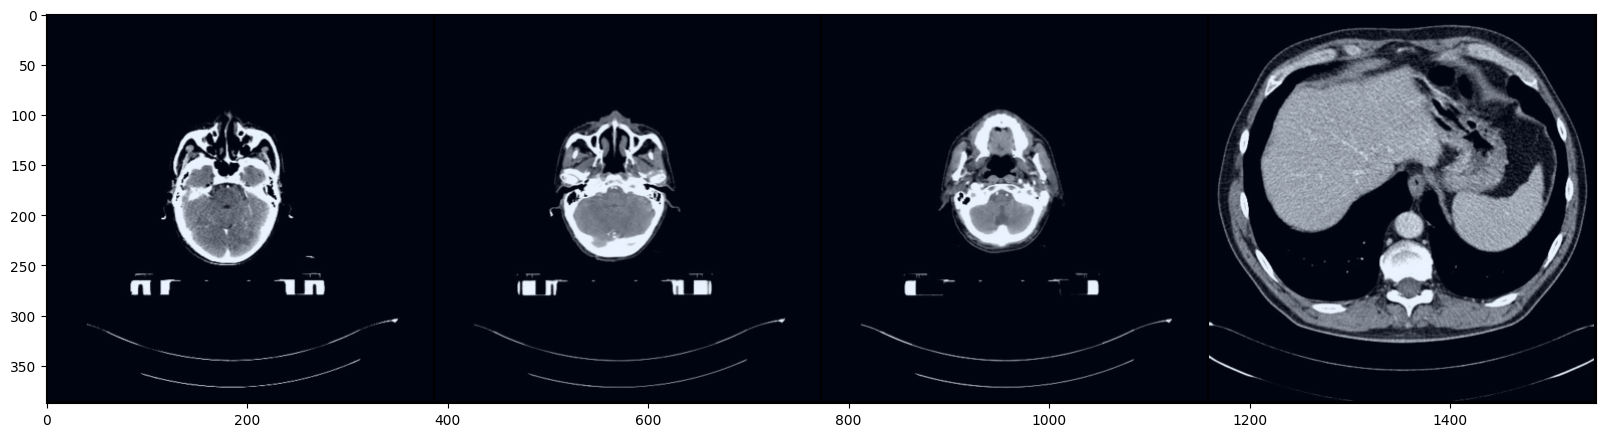

In [18]:
plt.figure(figsize = (20,10))
plt.imshow(make_grid(images, normalize=True).permute(1, 2, 0))

In [1]:
#VISUALIZATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from umap import UMAP
import json

In [16]:
with open('medvqa_dataset/RAD/caption_rad_embeddings.json', 'r', encoding='utf-8') as f:
        data = json.load(f)

In [17]:
embeddings = np.array(list(data.values()))

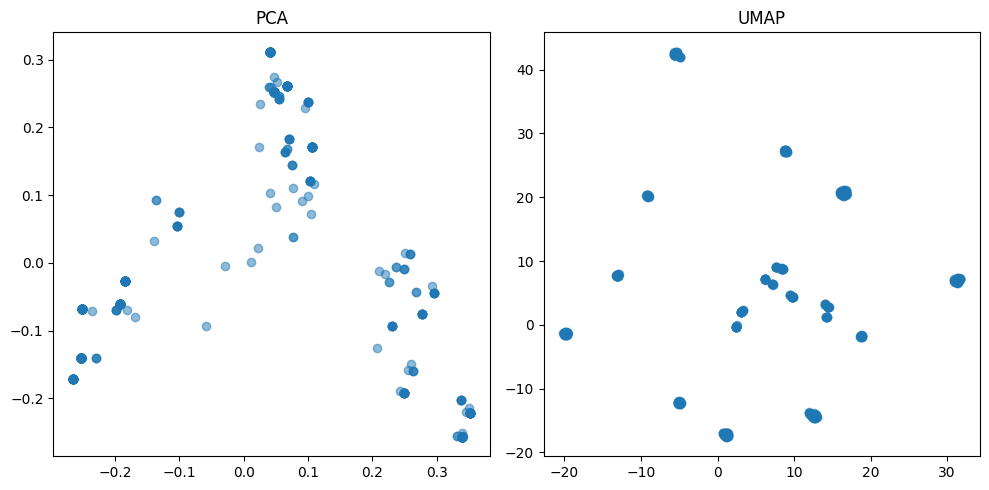

In [11]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Perform UMAP
umap = UMAP(n_components=2)
umap_result = umap.fit_transform(embeddings)

# Visualize PCA
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA')

# Visualize UMAP
plt.subplot(1, 2, 2)
plt.scatter(umap_result[:, 0], umap_result[:, 1], alpha=0.5)
plt.title('UMAP')

plt.tight_layout()
plt.show()

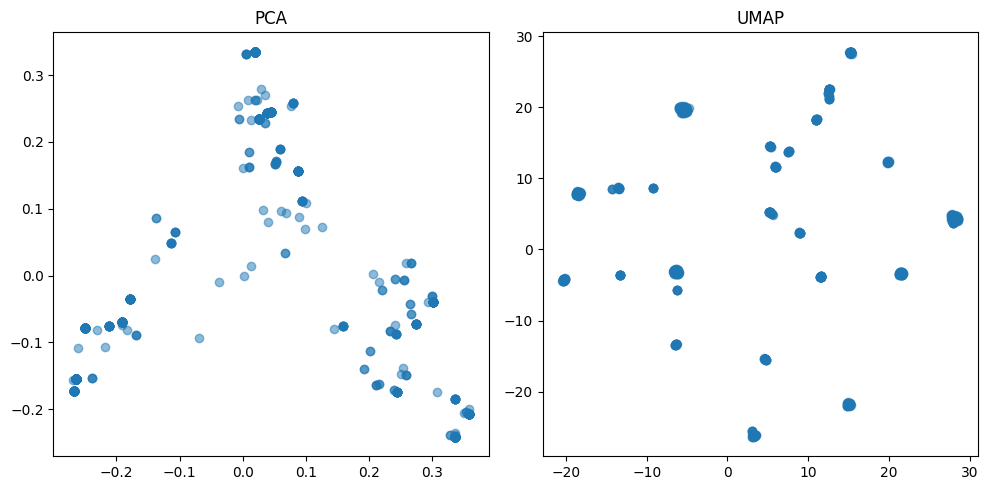

In [18]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Perform UMAP
umap = UMAP(n_components=2)
umap_result = umap.fit_transform(embeddings)

# Visualize PCA
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA')

# Visualize UMAP
plt.subplot(1, 2, 2)
plt.scatter(umap_result[:, 0], umap_result[:, 1], alpha=0.5)
plt.title('UMAP')

plt.tight_layout()
plt.show()

In [60]:
import json
with open('medvqa_dataset/RAD/captions.json', 'r', encoding='utf-8') as f:
    captions = json.load(f)

In [61]:
with open('medvqa_dataset/RAD/annotations_test.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [62]:
caption_data = []

In [63]:
for i, obj in enumerate(data):
    x = obj.copy()
    x['caption'] = captions[f'medvqa_dataset/RAD/images/{x["image_name"]}']
    caption_data.append(x.copy())
    print(i)
    print()

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

100

101

102

103

104

105

106

107

108

109

110

111

112

113

114

115

116

117

118

119

120

121

122

123

124

125

126

127

128

129

130

131

132

133

134

135

136

137

138

139

140

141

142

143

144

145

146

147

148

149

150

151

152

153

154

155

156

157

158

159

160

161

162

163

164

165

166

167

168

169

170

171

172

173

174

175

176

177

178

179

180

181

182

183

184

185

186

187

188

189

190

191

192

193

194

195

196

197

198

199

200

201

202

203

204

205

206

207

208

209

210

211

212

213

214

215

216

217

218

219

220

221



In [64]:
with open('medvqa_dataset/RAD/annotations_test_w_captions_medicap.json', "w") as json_file:
    json.dump(caption_data, json_file, indent=4)

In [2]:
import vertexai
from vertexai.generative_models import GenerativeModel, Part


def generate_text(img_path: str, question: str) -> str:
    # Initialize Vertex AI
    # vertexai.init(project='wide-approach-413514', location='us-central1')
    # Load the model
    multimodal_model = GenerativeModel("gemini-1.0-pro-vision")
    # Query the model
    response = multimodal_model.generate_content(
        [
            # Add an example image
            img_path,
            # Add an example query
            question,
        ]
    )
    return response.text

In [11]:
import json
with open('medvqa_dataset/RAD/annotations_test_w_gemini.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [14]:
with open('medvqa_dataset/RAD/annotations_test_w_gemini.json', "w") as json_file:
    json.dump(caption_data, json_file, indent=4)

In [12]:
caption_data = []
vis_root = 'medvqa_dataset/RAD/images/'
message = "You are an assistant who's job is to provide very detailed and captions of medical images to help enhancing a the performance of a Visual Question Answering model. Please provide a caption for the following image without any headers or extra annotation, just a single paragraph."

In [24]:
import os
for i, obj in enumerate(data):
    x = obj.copy()
    x['caption'] = generate_text(os.path.join(vis_root, x['img_name']), message)
    caption_data.append(x.copy())
    print(i)
    print(x['caption'])
    print()

0
This image shows a patient with a very large, ulcerating tumor on the dorsum of the right hand, over the metacarpophalangeal joint of the right thumb. The tumor is exophytic, measuring approximately 6 cm in greatest dimension. It has a necrotic center and is surrounded by an erythematous base. The surrounding skin is also erythematous and edematous. The tumor is firm to palpation and is not tender. There is no lymphadenopathy in the axilla or epitrochlear region.

1
This is a post-contrast abdominal CT scan. There is a large, enhancing mass in the right posterior liver, with a few small enhancing masses in the left liver. The mass in the right liver measures 10 cm x 8 cm x 8 cm. There are several enlarged lymph nodes in the porta hepatis. The spleen is enlarged and heterogeneous. There is a small amount of free fluid in the pelvis.

2
This is a frontal chest X-ray of a 46 year old male patient. The X-ray shows a widened mediastinum with deviation of the trachea to the right. There is

In [13]:
import os
for i, obj in enumerate(data):
    x = obj.copy()
    try:
        x['pred_answer'] = generate_text(os.path.join(vis_root, x['image_name']), x['question'])
        caption_data.append(x.copy())
        print(i)
        print('PRED ', x['pred_answer'])
        print('GT ', x['answer'])
        print()
    except:
        x['pred_answer'] = ''
        caption_data.append(x.copy())
        print(i)
        print('PRED ', x['pred_answer'])
        print('GT ', x['answer'])
        print()

0
PRED  No, there is no evidence of an aortic aneurysm.
GT  yes

1
PRED  Yes, there is airspace consolidation on the left side.
GT  Yes

2
PRED  No
GT  yes

3
PRED  The patient is oriented to the right lateral side.
GT  Posterior-Anterior

4
PRED  No
GT  yes

5
PRED  The provided image is not from the medvqa_dataset/RAD/images/synpic42202.jpg dataset, so I cannot provide an answer to the question.
GT  yes

6
PRED  No
GT  Yes

7
PRED  The image provided does not show a human subject and therefore I cannot assess the adequacy of inspiratory effort.
GT  Yes

8
PRED  No
GT  No

9
PRED  No
GT  No

10
PRED  The provided context does not mention anything about "intraparenchymal abnormalities in the lung fields" so I cannot answer this question from the provided context.
GT  No

11
PRED  Unable to access external links or specific websites, including the one you provided for the medical image. Therefore, I cannot assess the specific image you are referring to and provide an accurate answer reg

In [30]:
caption_data[0]

{'img_id': 102,
 'img_name': 'xmlab102/source.jpg',
 'question': 'What modality is used to take this image?',
 'answer': 'CT',
 'q_lang': 'en',
 'location': 'Lung',
 'modality': 'CT',
 'answer_type': 'OPEN',
 'base_type': 'vqa',
 'triple': ['vhead', '_', '_'],
 'qid': 11934,
 'content_type': 'Modality',
 'caption': 'This image shows a patient with a very large, ulcerating tumor on the dorsum of the right hand, over the metacarpophalangeal joint of the right thumb. The tumor is exophytic, measuring approximately 6 cm in greatest dimension. It has a necrotic center and is surrounded by an erythematous base. The surrounding skin is also erythematous and edematous. The tumor is firm to palpation and is not tender. There is no lymphadenopathy in the axilla or epitrochlear region.'}

In [15]:
import pandas as pd

df = pd.read_csv('medvqa_dataset/PMC-VQA/train.csv')

In [12]:
df.shape

(152603, 10)

In [17]:
for index, row in df.iterrows():
    print(row)
    break

Figure_path                                   PMC1064097_F1.jpg
Question             What is the uptake pattern in the breast? 
Answer                                     Focal uptake pattern
Choice A                              A:Diffuse uptake pattern 
Choice B                                B:Focal uptake pattern 
Choice C                                   C:No uptake pattern 
Choice D         D:Cannot determine from the information given 
Answer_label                                                  B
Name: 0, dtype: object
